In [59]:
import numpy as np
from typing import Tuple, List, Union, Optional
import SimpleITK as sitk

#from nnunetv2.imageio.base_reader_writer import BaseReaderWriter

Prendre un cas sur le jeu de validation du fold 0 : AFCT: 17/02/28-17:09:14 ==> la_009_0000.mha 

segmentation ref NON preprocessed : '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset001_LA_CT01/labelsTr/la_009.mha'

preprocessed data :

segmentation ref preprocessed :
'/media/sharedata/atriumCT/atrium_nnunet/nnUNet_preprocessed/Dataset001_LA_CT01/nnUNetPlans_3d_fullres/la_009_seg.npy'

image : '/media/sharedata/atriumCT/atrium_nnunet/nnUNet_preprocessed/Dataset001_LA_CT01/nnUNetPlans_3d_fullres/la_009.npy'

segmentation prediction :
'/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset001_LA_CT01/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/la_009.mha'

In [60]:
reference_file = '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset001_LA_CT01/labelsTr/la_009.mha'
prediction_file = '/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset001_LA_CT01/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/la_009.mha'

#seg_ref = sitk.ReadImage(reference_file)

#results = compute_metrics(reference_file, prediction_file, labels_or_regions)
#results

In [91]:
reference_file = '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset002_LA_CT00/labelsTr/la_trans_009.mha'
prediction_file = '/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset002_LA_CT00/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/la_trans_009.mha'

#seg_ref = sitk.ReadImage(reference_file)

#results = compute_metrics(reference_file, prediction_file, labels_or_regions)
#results

In [92]:
#ignore_label = None
#
seg_ref = sitk.ReadImage(reference_file)
seg_pred = sitk.ReadImage(prediction_file)
#ignore_mask = seg_ref == ignore_label if ignore_label is not None else None
#
#results = {}
#results['reference_file'] = reference_file
#results['prediction_file'] = prediction_file
#results['metrics'] = {}
#for r in labels_or_regions:
#    results['metrics'][r] = {}
#    mask_ref = region_or_label_to_mask(seg_ref, r)
#    mask_pred = region_or_label_to_mask(seg_pred, r)

In [5]:
#if ignore_mask is None:
#    use_mask = np.ones_like(mask_ref, dtype=bool)
#else:
#    use_mask = ~ignore_mask

In [6]:
seg_ref.GetSize()

(442, 284, 421)

In [7]:
seg_pred.GetSize()

(442, 284, 421)

In [12]:
def compute_dice_coefficient(mask_gt, mask_pred):
    """Computes soerensen-dice coefficient.

    compute the soerensen-dice coefficient between the ground truth mask `mask_gt`
    and the predicted mask `mask_pred`.

    Args:
      mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
      mask_pred: 3-dim Numpy array of type bool. The predicted mask.

    Returns:
      the dice coeffcient as float. If both masks are empty, the result is NaN.
    """
    volume_sum = mask_gt.sum() + mask_pred.sum()
    if volume_sum == 0:
        return np.NaN
    volume_intersect = (mask_gt & mask_pred).sum()
    return 2*volume_intersect / volume_sum 

In [65]:
seg_ref_arr = sitk.GetArrayFromImage(seg_ref)
seg_pred_arr = sitk.GetArrayFromImage(seg_pred)

compute_dice_coefficient(seg_ref_arr, seg_pred_arr)

0.9679629717960822

In [93]:
seg_ref_arr = sitk.GetArrayFromImage(seg_ref)
seg_pred_arr = sitk.GetArrayFromImage(seg_pred)

compute_dice_coefficient(seg_ref_arr, seg_pred_arr)

0.9660626960460384

Metric obtenue avec la dice de NNUnet : 0.9679629717960822

Les 2 sont donc égales.

In [10]:
seg_ref_arr.shape

(421, 284, 442)

In [11]:
seg_ref_arr.shape[0]

421

In [12]:
seg_pred_arr.shape[0]

421

In [10]:
s=[]
for i in range(421):
    s.append(compute_dice_coefficient(seg_ref_arr[i, :, :], seg_pred_arr[i, :, :]))
np.nanmean(s)

0.7875572794250968

In [11]:
np.sum(np.isnan(s))

108

Number of NaN : 108

In [12]:
s_arr = np.array(s)

In [13]:
import matplotlib.pyplot as plt

(array([ 53.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   2.,   3.,   0.,   0.,   3.,   1.,   1.,   2.,
          2.,   2.,   3.,  30.,  79., 129.]),
 array([0.        , 0.01969254, 0.03938508, 0.05907761, 0.07877015,
        0.09846269, 0.11815523, 0.13784777, 0.1575403 , 0.17723284,
        0.19692538, 0.21661792, 0.23631046, 0.25600299, 0.27569553,
        0.29538807, 0.31508061, 0.33477315, 0.35446568, 0.37415822,
        0.39385076, 0.4135433 , 0.43323584, 0.45292838, 0.47262091,
        0.49231345, 0.51200599, 0.53169853, 0.55139107, 0.5710836 ,
        0.59077614, 0.61046868, 0.63016122, 0.64985376, 0.66954629,
        0.68923883, 0.70893137, 0.72862391, 0.74831645, 0.76800898,
        0.78770152, 0.80739406, 0.8270866 , 0.84677914, 0.86647167,
        0.88616421, 0.90585675, 0.92554929, 0.

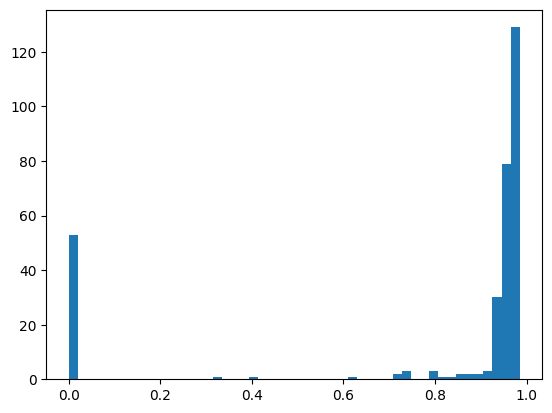

In [14]:
plt.hist(s_arr[~np.isnan(s_arr)], bins=50)

In [2]:
import os

In [14]:
path = '/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset001_LA_CT01/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/'
files = [f for f in os.listdir( path ) if f[-4:]=='.mha']
files

['la_009.mha',
 'la_010.mha',
 'la_011.mha',
 'la_027.mha',
 'la_028.mha',
 'la_033.mha',
 'la_035.mha',
 'la_040.mha',
 'la_046.mha',
 'la_048.mha',
 'la_052.mha',
 'la_054.mha',
 'la_055.mha',
 'la_056.mha',
 'la_066.mha',
 'la_068.mha',
 'la_070.mha',
 'la_087.mha',
 'la_089.mha',
 'la_090.mha',
 'la_097.mha',
 'la_099.mha',
 'la_100.mha',
 'la_101.mha',
 'la_115.mha',
 'la_135.mha',
 'la_136.mha',
 'la_148.mha',
 'la_150.mha',
 'la_154.mha',
 'la_156.mha',
 'la_157.mha',
 'la_159.mha',
 'la_160.mha',
 'la_163.mha',
 'la_168.mha',
 'la_177.mha',
 'la_180.mha',
 'la_183.mha',
 'la_188.mha',
 'la_190.mha',
 'la_191.mha',
 'la_195.mha',
 'la_203.mha',
 'la_207.mha',
 'la_215.mha',
 'la_216.mha',
 'la_220.mha',
 'la_234.mha',
 'la_240.mha',
 'la_241.mha',
 'la_246.mha',
 'la_253.mha',
 'la_258.mha',
 'la_262.mha',
 'la_266.mha',
 'la_270.mha',
 'la_275.mha',
 'la_282.mha',
 'la_291.mha',
 'la_296.mha',
 'la_298.mha',
 'la_300.mha',
 'la_305.mha',
 'la_313.mha',
 'la_314.mha',
 'la_320.m

In [15]:
print( len(files))

108


In [17]:
pred_files = ['/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset001_LA_CT01/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation/' + f for f in files]

In [18]:
pred_files_ensemble = ['/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset001_LA_CT01/TEST_ENSEMBLE/' + f for f in files]

In [19]:
ref_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset001_LA_CT01/labelsTr/' + f for f in files]

In [16]:
dices = []
for i in range(len(pred_files)):
    seg_ref = sitk.ReadImage(ref_files[i])
    seg_pred = sitk.ReadImage(pred_files[i])
    seg_ref_arr = sitk.GetArrayFromImage(seg_ref)
    seg_pred_arr = sitk.GetArrayFromImage(seg_pred)
    dice = compute_dice_coefficient(seg_ref_arr, seg_pred_arr)
    dices.append(dice)
    print(dice)

0.9679629717960822
0.9569560449517284
0.970880047103007
0.9691823196305418
0.9731163409022296
0.8896922690623478
0.955363748668548
0.9580280228944832
0.9247861125761672
0.96271875548817
0.8955450809324688
0.9394141002972332
0.9665293393736086
0.9381653040511123
0.9211807803254902
0.9656920434132401
0.9211951327187083
0.9747102903354178
0.9793814918803025
0.9785512477378869
0.9549664021277204
0.7290203468688453
0.9773832849210196
0.9505279976131851
0.9332863803790625
0.980347092958001
0.9858202452419125
0.9855255750877218
0.9281452541565052
0.957646830211428
0.9823354549075362
0.9723559034436364
0.9585087855374216
0.9787803289482374
0.9266076004163849
0.9827240361670201
0.9748219821525742
0.9314599950307744
0.9702416638452198
0.9257971976871474
0.9700566167566408
0.951072386250852
0.9859536278570665
0.9753632562565179
0.931421964342652
0.9685688850760019
0.964830656120345
0.9664628360196547
0.9768255950599626
0.9539746293071202
0.9826457261538838
0.991519723937
0.9765427521872129
0.9688

In [17]:
np.mean(dices)

0.9570443971822534

In [19]:
dices = []
for i in range(len(pred_files_ensemble)):
    seg_ref = sitk.ReadImage(ref_files[i])
    seg_pred = sitk.ReadImage(pred_files_ensemble[i])
    seg_ref_arr = sitk.GetArrayFromImage(seg_ref)
    seg_pred_arr = sitk.GetArrayFromImage(seg_pred)
    dice = compute_dice_coefficient(seg_ref_arr, seg_pred_arr)
    dices.append(dice)
    print(dice)

0.9721027739308873
0.9559794633516568
0.9796750769406486
0.9706716279176599
0.976031606817731
0.9715616678410037
0.9751193463332047
0.9676125155918407
0.9716873442657169
0.9730181828316677
0.965109933625348
0.946546432346395
0.9684221503882046
0.8413922205497131
0.9739128390829918
0.9823946743517262
0.9782039839270011
0.984457214172699
0.9832209894498783
0.9831614932296349
0.9697093408330644
0.7668551608577941
0.9817774265627726
0.9766808129530724
0.946453464920893
0.9825133711590807
0.9870645072804417
0.9875180047539185
0.9851748183023474
0.9683448855668673
0.9862031301218248
0.9788444678845346
0.9817953638779608
0.9793389557353765
0.9544478871506695
0.9852510315369365
0.9750254021542846
0.9830296253019484
0.9783936890166466
0.9855132835997907
0.9760745726487678
0.9638714268599324
0.9880954151843928
0.9902109229945353
0.9687472760327835
0.96561040686495
0.9732676406915873
0.9756701531461057
0.9835323755295928
0.9773278458158916
0.9801652697376363
0.9920905221081155
0.9843870938387592


In [20]:
np.mean(dices)

0.9732507028037477

In [66]:
def compute_IoU_coefficient(mask_gt, mask_pred):
    """Computes IoU coefficient.

    compute the IoU coefficient between the ground truth mask `mask_gt`
    and the predicted mask `mask_pred`.

    Args:
      mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
      mask_pred: 3-dim Numpy array of type bool. The predicted mask.

    Returns:
      the IoU coeffcient as float. If both masks are empty, the result is NaN.
    """
    volume_union = (mask_gt | mask_pred).sum()
    if volume_union == 0:
        return np.NaN
    volume_intersect = (mask_gt & mask_pred).sum()
    return volume_intersect / volume_union 

In [94]:
def compute_contour_volume(mask_gt, mask_pred):
    """Computes IoU coefficient.

    compute the IoU coefficient between the ground truth mask `mask_gt`
    and the predicted mask `mask_pred`.

    Args:
      mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
      mask_pred: 3-dim Numpy array of type bool. The predicted mask.

    Returns:
      the IoU coeffcient as float. If both masks are empty, the result is NaN.
    """
    volume_union = (mask_gt | mask_pred).sum()
    if volume_union == 0:
        return np.NaN
    volume_intersect = (mask_gt & mask_pred).sum()
    return volume_union - volume_intersect

In [79]:
compute_IoU_coefficient(seg_ref_arr, seg_pred_arr)

0.9379149636526651

In [95]:
compute_IoU_coefficient(seg_ref_arr, seg_pred_arr)

0.9343532652817937

In [96]:
volume_union = (seg_ref_arr | seg_pred_arr).sum()
volume_union

1149227

In [97]:
volume_ref = seg_ref_arr.sum()
volume_ref

1104719

In [100]:
#vol réel
5656123*0.25**3

88376.921875

In [101]:
#vol réel
1104719*0.447266* 0.447266* 0.4

88398.23337342942

In [103]:
88.398**(1/3)

4.454655734147135

In [84]:
volume_pred = seg_pred_arr.sum()
volume_pred

5853590

In [73]:
# Volume en termes de pixels
compute_contour_volume(seg_ref_arr, seg_pred_arr)

368737

In [98]:
seg_ref.GetSpacing()

(0.447266, 0.447266, 0.4)

In [78]:
# Volume réel
compute_contour_volume(seg_ref_arr, seg_pred_arr) * 0.25**3

5761.515625

5761 mm^3 = 5.761 cm^3

In [105]:
5.761**(1/3)

1.7926656288411764

In [4]:
path = '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/'
files = [f for f in os.listdir( path ) if f[-4:]=='.mha']
files

['la_trans_corrected_102_060.mha',
 'la_trans_corrected_103_061.mha',
 'la_trans_corrected_104_062.mha',
 'la_trans_corrected_105_063.mha',
 'la_trans_corrected_106_064.mha',
 'la_trans_corrected_107_065.mha',
 'la_trans_corrected_108_066.mha',
 'la_trans_corrected_109_067.mha',
 'la_trans_corrected_110_068.mha',
 'la_trans_corrected_111_069.mha',
 'la_trans_corrected_112_070.mha',
 'la_trans_corrected_113_071.mha',
 'la_trans_corrected_115_072.mha',
 'la_trans_corrected_116_073.mha',
 'la_trans_corrected_118_074.mha',
 'la_trans_corrected_120_075.mha',
 'la_trans_corrected_123_076.mha',
 'la_trans_corrected_125_077.mha',
 'la_trans_corrected_128_078.mha',
 'la_trans_corrected_131_079.mha',
 'la_trans_corrected_13_004.mha',
 'la_trans_corrected_14_005.mha',
 'la_trans_corrected_150_080.mha',
 'la_trans_corrected_155_081.mha',
 'la_trans_corrected_16_006.mha',
 'la_trans_corrected_17_007.mha',
 'la_trans_corrected_20_008.mha',
 'la_trans_corrected_213_082.mha',
 'la_trans_corrected_21_0

In [5]:
print( len(files))

131


In [6]:
pred_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/' + f for f in files]

In [7]:
ref_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/' + f for f in files]

# Dice sur l'ensemble

In [53]:
import pandas as pd
import numpy as np
from typing import Tuple, List, Union, Optional
import SimpleITK as sitk
import os
pd.options.display.max_rows = 999

In [103]:
df = pd.read_csv('/media/sharedata/atriumCT/corrected_data/patients_history.csv')

df.head()

df['Dice'] = np.NaN
df['IoU'] = np.NaN
#df['nnUnet_id'] = np.NaN

for i in range(len(pred_files[:5])):
    seg_ref = sitk.ReadImage(ref_files[i])
    print(ref_files[i])
    seg_pred = sitk.ReadImage(pred_files[i])
    id = int(pred_files[i][-11:-8])
    nnunet_id = int(pred_files[i][-7:-4])
    print(id)
    seg_pred_resampled_labelGaussian = sitk.Resample(seg_pred, seg_ref, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_pred.GetPixelID())
    seg_ref_arr = sitk.GetArrayFromImage(seg_ref)
    seg_pred_arr = sitk.GetArrayFromImage(seg_pred_resampled_labelGaussian)
    dice = compute_dice_coefficient(seg_ref_arr, seg_pred_arr)
    IoU = compute_IoU_coefficient(seg_ref_arr, seg_pred_arr)
    df.loc[df['ID']==id,'Dice'] = dice
    df.loc[df['ID']==id,'IoU'] = IoU
    df.loc[df['ID']==id,'nnUnet_id'] = nnunet_id
df['nnUnet_id'] = df['nnUnet_id'].astype('int')
df.to_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/patients_history.csv')

/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_102_060.mha
102
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_103_061.mha
103
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_104_062.mha
104
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_105_063.mha
105
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_106_064.mha
106


In [83]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/patients_history_contour_vol.csv')

In [84]:
df

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2
0,0,0,6,1,0,1,0,0,0.902653,0.822578,0.0,30901.0,1.080078,0.847656,0.839844
1,1,1,7,1,0,1,0,1,0.908900,0.833013,1.0,480983.0,0.354259,0.354259,0.354259
2,2,2,8,0,0,0,0,0,0.963089,0.928806,2.0,19060.0,1.046875,0.763672,0.736328
3,3,3,9,1,0,1,0,1,0.980152,0.961077,3.0,12770.0,1.158203,0.900391,0.865234
4,4,4,11,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,13,0,0,0,0,0,0.950502,0.905673,4.0,20880.0,1.140625,0.888672,0.765625
6,6,6,14,1,0,1,0,1,0.969161,0.940168,5.0,16502.0,1.138672,0.720703,0.798828
7,7,7,16,0,0,0,0,0,0.976274,0.953648,6.0,13524.0,1.121094,0.787109,0.789062
8,8,8,17,0,0,0,0,1,0.965133,0.932615,7.0,21312.0,1.148438,0.748047,0.808594
9,9,9,20,0,0,0,0,0,0.962635,0.927961,8.0,16176.0,0.990234,0.921875,0.851562


### Testons en enlevant les outliers.

In [85]:
df[df['Dice'] < 0.8]

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2
29,29,29,46,1,0,1,0,0,0.748148,0.597633,29.0,190749.0,1.156250,0.763672,1.125000
62,62,62,104,0,0,0,0,0,0.174984,0.095881,62.0,433074.0,1.144531,0.765625,0.738281


In [86]:
df[df['nnUnet_id'].isna()]

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2
4,4,4,11,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df = df[(df['ID']!=46)&(df['ID']!=104)&(df['ID']!=11)]

In [88]:
df_opa = df[df['LAA_opacification_defect']==1]

In [89]:
df_no_opa = df[df['LAA_opacification_defect']==0]

In [90]:
df_no_opa.shape

(75, 15)

In [91]:
df_opa.shape

(54, 15)

In [92]:
df_no_opa.shape

(75, 15)

<AxesSubplot:>

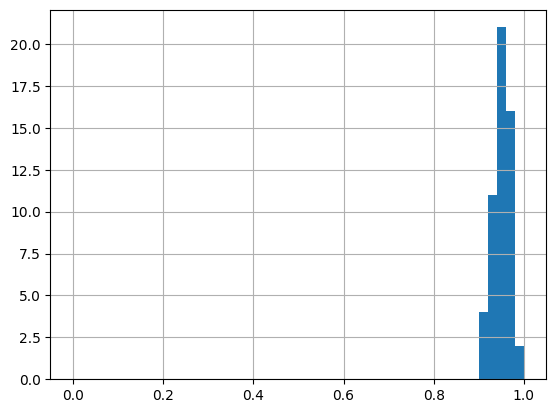

In [93]:
df_opa['Dice'].hist(bins=50, range=(0, 1))

<AxesSubplot:>

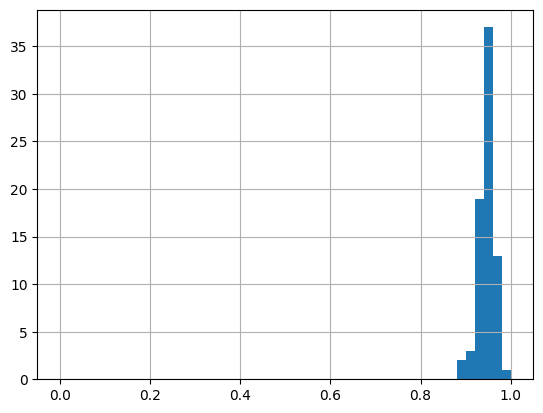

In [94]:
df_no_opa['Dice'].hist(bins=50, range=(0, 1))

In [95]:
df_opa.describe()[['Dice', 'IoU']]

,Dice,IoU
count,54.000000,54.000000
mean,0.948801,0.903113
std,0.017600,0.031829
min,0.908900,0.833013
25%,0.939659,0.886186
50%,0.945070,0.895861
75%,0.965069,0.932496
max,0.980453,0.961656


In [96]:
df_no_opa.describe()[['Dice', 'IoU']]

,Dice,IoU
count,75.000000,75.000000
mean,0.945179,0.896538
std,0.016995,0.030301
min,0.890473,0.802570
25%,0.934656,0.877328
50%,0.946245,0.897975
75%,0.954985,0.913849
max,0.981583,0.963833


Visiblement les scores sont légèrement meilleurs sur les cas avec opacification. Ce qui est l'inverse de ce qu'on l'on avait prédit.

Même remarque que précédemment. On ne peut pas conclure.
Cela vient sûrement de l'erreur sur la découpe des veines qui est non négligeable.

In [97]:
# Fobs pour l'hypothèse de l'homogénéité des variances
0.017600/0.016995

1.0355987055016183

In [98]:
# S(A)
df_opa['Dice'].sum()

51.23527261702568

In [99]:
# S(B)
df_no_opa_without_outliers['Dice'].sum()

70.88844104977252

In [100]:
# S
df_opa['Dice'].sum() + df_no_opa_without_outliers['Dice'].sum()

122.12371366679821

In [101]:
df_opa['Dice_carre'] = df_opa['Dice']*df_opa['Dice']

/tmp/ipykernel_43162/2641122716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opa['Dice_carre'] = df_opa['Dice']*df_opa['Dice']


In [102]:
df_no_opa_without_outliers['Dice_carre'] = df_no_opa_without_outliers['Dice']*df_no_opa_without_outliers['Dice']

In [103]:
# S^2(A)
df_opa['Dice_carre'].sum()

48.62851294007697

In [104]:
# S^2(B)
df_no_opa_without_outliers['Dice_carre'].sum()

67.0236555373663

In [105]:
# S^2
df_opa['Dice_carre'].sum() + df_no_opa_without_outliers['Dice_carre'].sum()

115.65216847744327

In [106]:
# SCE(A)
SCE_A = df_opa['Dice_carre'].sum() - (df_opa['Dice'].sum()**2)/54
SCE_A

0.016417381911395523

In [107]:
# SCE(B)
SCE_B = df_no_opa_without_outliers['Dice_carre'].sum() - (df_no_opa_without_outliers['Dice'].sum()**2)/75
SCE_B

0.021374544471967738

In [108]:
from math import *

In [109]:
#T
(df_opa['Dice'].mean() - df_no_opa_without_outliers['Dice'].mean()) / sqrt((SCE_A + SCE_B)/(54 + 75 - 2)*(1/54 + 1/75))

1.176519491898233

In [110]:
S_xa_xb = sqrt(((54-1)*0.017600**2 + (75-1)*0.016995**2) / (54+75-2))
S_xa_xb

0.017250060333113704

In [111]:
mean_a = df_opa['Dice'].mean()
mean_a

0.9488013447597348

In [112]:
mean_b = df_no_opa_without_outliers['Dice'].mean()
mean_b

0.945179213996967

In [113]:
T = (mean_a - mean_b) / (S_xa_xb * sqrt(1/54 + 1/75))
T

1.1765385531438484

In [114]:
54 + 75 -2

127

In [56]:
df

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2
0,0,0,6,1,0,1,0,0,0.902653,0.822578,0.0,30901.0,1.080078,0.847656,0.839844
1,1,1,7,1,0,1,0,1,0.908900,0.833013,1.0,480983.0,0.354259,0.354259,0.354259
2,2,2,8,0,0,0,0,0,0.963089,0.928806,2.0,19060.0,1.046875,0.763672,0.736328
3,3,3,9,1,0,1,0,1,0.980152,0.961077,3.0,12770.0,1.158203,0.900391,0.865234
4,4,4,11,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,13,0,0,0,0,0,0.950502,0.905673,4.0,20880.0,1.140625,0.888672,0.765625
6,6,6,14,1,0,1,0,1,0.969161,0.940168,5.0,16502.0,1.138672,0.720703,0.798828
7,7,7,16,0,0,0,0,0,0.976274,0.953648,6.0,13524.0,1.121094,0.787109,0.789062
8,8,8,17,0,0,0,0,1,0.965133,0.932615,7.0,21312.0,1.148438,0.748047,0.808594
9,9,9,20,0,0,0,0,0,0.962635,0.927961,8.0,16176.0,0.990234,0.921875,0.851562


In [57]:
df['Contour_Volume'] * df['Spacing_ref_0'] * df['Spacing_ref_1'] * df['Spacing_ref_2']/1000

0       23.759974
1       21.384112
2       11.220079
3       11.522331
4             NaN
5       16.204324
6       10.817949
7        9.416588
8       14.804398
9       12.574702
10      10.129503
11       9.040730
12      10.972206
13       9.379290
14      13.025177
15       9.702296
16      21.922108
17      16.595161
18      14.883060
19       9.122426
20      11.297653
21       7.419799
22       8.312782
23      19.717156
24      14.124665
25       8.046586
26      11.630479
27      15.067141
28       7.554097
29     189.484345
30      11.178919
31      12.788888
32       8.940121
33       9.484251
34       9.779627
35      14.071829
36      18.835268
37      15.520002
38      11.073994
39      10.851877
40      16.646010
41      10.514058
42      19.462601
43      17.717490
44      27.023769
45       8.166083
46      18.407790
47      12.620946
48      13.394236
49      18.570827
50      23.804178
51      15.280805
52       9.085495
53      15.665875
54      29.877673
55      17

<AxesSubplot:>

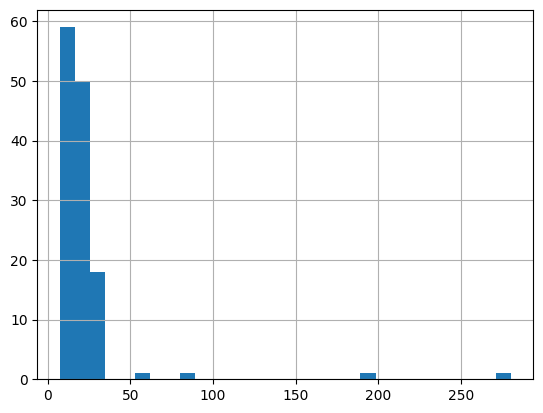

In [61]:
df['Volume_cm3'] = (df['Contour_Volume'] * df['Spacing_ref_0'] * df['Spacing_ref_1'] * df['Spacing_ref_2']/1000)
df['Volume_cm3'].hist(bins = 30)

In [62]:
df[df['Volume_cm3'] >40]

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,Volume_cm3
29,29,29,46,1,0,1,0,0,0.748148,0.597633,29.0,190749.0,1.156250,0.763672,1.125000,189.484345
62,62,62,104,0,0,0,0,0,0.174984,0.095881,62.0,433074.0,1.144531,0.765625,0.738281,280.173923
126,126,126,275,0,0,0,0,0,0.890473,0.802570,125.0,1135585.0,0.414793,0.414793,0.414793,81.042427
127,127,127,276,0,0,0,1,1,0.917019,0.846754,126.0,528296.0,0.471395,0.471395,0.471395,55.339068


In [63]:
81.042427**(1/3)

4.327504015144427

In [64]:
55.339068**(1/3)

3.8107513622075846

In [67]:
df['Volume_cm3'].mean()

21.94483861066345

In [66]:
df['Volume_cm3'].mean()**(1/3)

2.799695486044651

# Compute Dice on auricles

In [1]:
import pandas as pd
import numpy as np
from typing import Tuple, List, Union, Optional
import SimpleITK as sitk
import os
pd.options.display.max_rows = 999

In [2]:
path = '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/'
files = [f for f in os.listdir( path ) if f[-4:]=='.mha']
files

['la_trans_corrected_102_060.mha',
 'la_trans_corrected_103_061.mha',
 'la_trans_corrected_104_062.mha',
 'la_trans_corrected_105_063.mha',
 'la_trans_corrected_106_064.mha',
 'la_trans_corrected_107_065.mha',
 'la_trans_corrected_108_066.mha',
 'la_trans_corrected_109_067.mha',
 'la_trans_corrected_110_068.mha',
 'la_trans_corrected_111_069.mha',
 'la_trans_corrected_112_070.mha',
 'la_trans_corrected_113_071.mha',
 'la_trans_corrected_115_072.mha',
 'la_trans_corrected_116_073.mha',
 'la_trans_corrected_118_074.mha',
 'la_trans_corrected_120_075.mha',
 'la_trans_corrected_123_076.mha',
 'la_trans_corrected_125_077.mha',
 'la_trans_corrected_128_078.mha',
 'la_trans_corrected_131_079.mha',
 'la_trans_corrected_13_004.mha',
 'la_trans_corrected_14_005.mha',
 'la_trans_corrected_150_080.mha',
 'la_trans_corrected_155_081.mha',
 'la_trans_corrected_16_006.mha',
 'la_trans_corrected_17_007.mha',
 'la_trans_corrected_20_008.mha',
 'la_trans_corrected_213_082.mha',
 'la_trans_corrected_21_0

In [3]:
path = '/media/sharedata/atriumCT/corrected_data/GTlabels/'
files_id_labels = [f for f in os.listdir( path ) if f[-4:]=='.mha']
files_id_labels

['102.mha',
 '103.mha',
 '104.mha',
 '105.mha',
 '106.mha',
 '107.mha',
 '108.mha',
 '109.mha',
 '11.mha',
 '110.mha',
 '111.mha',
 '112.mha',
 '113.mha',
 '115.mha',
 '116.mha',
 '118.mha',
 '120.mha',
 '123.mha',
 '125.mha',
 '128.mha',
 '13.mha',
 '131.mha',
 '14.mha',
 '150.mha',
 '155.mha',
 '16.mha',
 '17.mha',
 '20.mha',
 '21.mha',
 '213.mha',
 '22.mha',
 '227.mha',
 '228.mha',
 '23.mha',
 '230.mha',
 '231.mha',
 '232.mha',
 '233.mha',
 '234.mha',
 '235.mha',
 '236.mha',
 '237.mha',
 '238.mha',
 '239.mha',
 '24.mha',
 '240.mha',
 '241.mha',
 '242.mha',
 '243.mha',
 '244.mha',
 '245.mha',
 '246.mha',
 '247.mha',
 '249.mha',
 '25.mha',
 '251.mha',
 '252.mha',
 '253.mha',
 '254.mha',
 '255.mha',
 '256.mha',
 '257.mha',
 '258.mha',
 '259.mha',
 '260.mha',
 '261.mha',
 '262.mha',
 '263.mha',
 '264.mha',
 '265.mha',
 '267.mha',
 '268.mha',
 '269.mha',
 '27.mha',
 '272.mha',
 '273.mha',
 '274.mha',
 '275.mha',
 '276.mha',
 '277.mha',
 '278.mha',
 '28.mha',
 '282.mha',
 '29.mha',
 '30.m

In [4]:
print( len(files))

131


In [5]:
pred_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/' + f for f in files]

In [6]:
ref_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/' + f for f in files]

In [7]:
ref_files

['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_102_060.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_103_061.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_104_062.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_105_063.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_106_064.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_107_065.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_108_066.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_109_067.mha',
 '/media/sharedata/atriu

In [8]:
ref_label_files = ['/media/sharedata/atriumCT/corrected_data/GTlabels/' + f[-11:-8].split('_')[-1] + '.mha' for f in files]

In [9]:
ref_label_files

['/media/sharedata/atriumCT/corrected_data/GTlabels/102.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/103.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/104.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/105.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/106.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/107.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/108.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/109.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/110.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/111.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/112.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/113.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/115.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/116.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/118.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/120.mha',
 '/media

In [10]:
def get_intersection(mask_1, mask_2):
    return (mask_1 & mask_2)

In [61]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/patients_history_contour_vol.csv')

df.head()

df['Dice_auricle'] = np.NaN
#df['IoU'] = np.NaN
#df['nnUnet_id'] = np.NaN

#for i in range(len(pred_files[:5])):
i=0
seg_ref = sitk.ReadImage(ref_files[i])
print(ref_files[i])
seg_pred = sitk.ReadImage(pred_files[i])
seg_ref_label =  sitk.ReadImage(ref_label_files[i])



id = int(pred_files[i][-11:-8])
#nnunet_id = int(pred_files[i][-7:-4])
print(id)
seg_pred_resampled_labelGaussian = sitk.Resample(seg_pred, seg_ref, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_pred.GetPixelID())
seg_ref_arr = sitk.GetArrayFromImage(seg_ref)

seg_pred_arr = sitk.GetArrayFromImage(seg_pred_resampled_labelGaussian)
seg_ref_label_arr = sitk.GetArrayFromImage(seg_ref_label)
seg_ref_auricule_arr = (seg_ref_label_arr == 2)

ref_label_intersection = get_intersection(seg_ref_arr, seg_ref_auricule_arr)
pred_label_intersection = get_intersection(seg_pred_arr, seg_ref_auricule_arr)

dice_auricle = compute_dice_coefficient(ref_label_intersection, pred_label_intersection)
#IoU = compute_IoU_coefficient(seg_ref_arr, seg_pred_arr)
#df.loc[df['ID']==id,'Dice_auricle'] = dice

#df.loc[df['ID']==id,'Dice'] = dice
#df.loc[df['ID']==id,'IoU'] = IoU
#df.loc[df['ID']==id,'nnUnet_id'] = nnunet_id

/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_102_060.mha
102


In [31]:
seg_ref_arr.shape

(202, 247, 311)

In [20]:
seg_pred_arr.shape

(202, 247, 311)

In [21]:
seg_ref_label_arr.shape

(202, 247, 311)

In [22]:
seg_ref_auricule_arr.shape

(202, 247, 311)

In [23]:
dice_auricle

0.6271999804003834

In [33]:
from matplotlib.pyplot import imshow


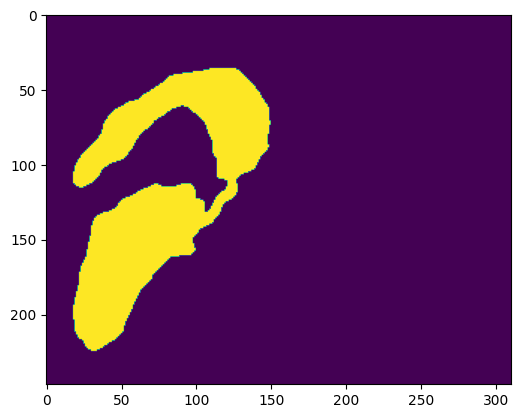

In [34]:
slices = 170
imshow(seg_ref_arr[slices,:,:])

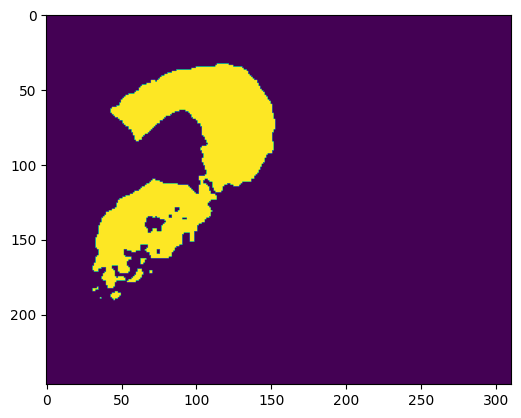

In [35]:
imshow(seg_pred_arr[slices,:,:])

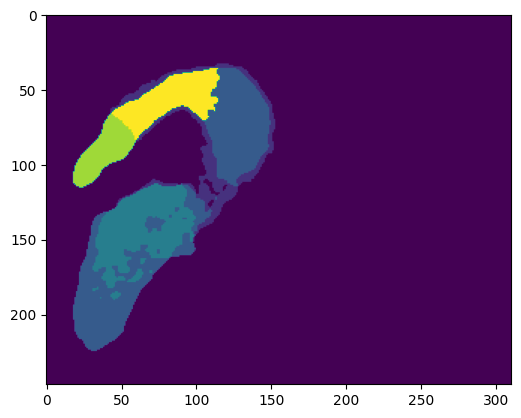

In [41]:
imshow(seg_ref_label_arr[slices,:,:] + seg_pred_arr[slices,:,:])

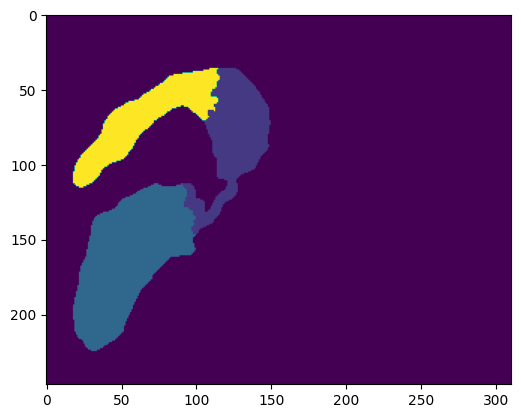

In [36]:
imshow(seg_ref_label_arr[slices,:,:])

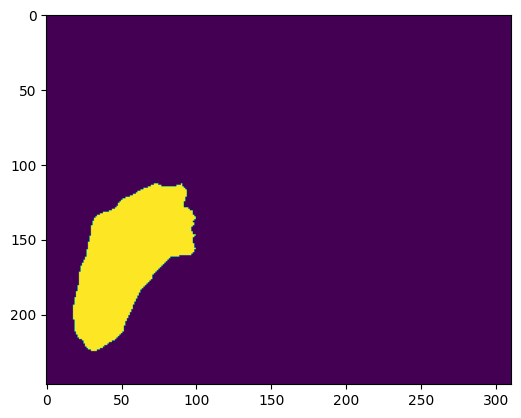

In [37]:
imshow(seg_ref_auricule_arr[slices,:,:])

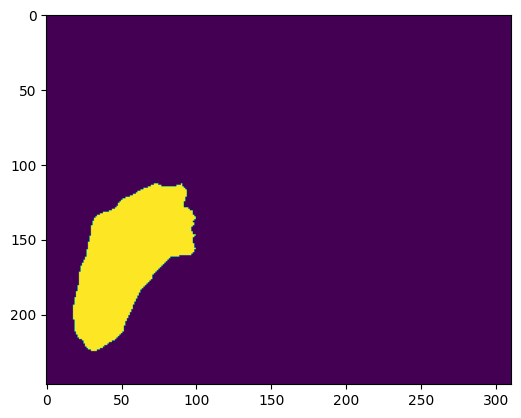

In [38]:
imshow(ref_label_intersection[slices,:,:])

In [39]:
(seg_ref_auricule_arr == ref_label_intersection).all()

True

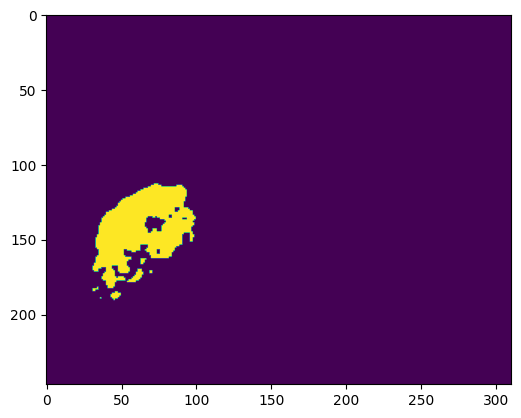

In [40]:
imshow(pred_label_intersection[slices,:,:])

# i=1

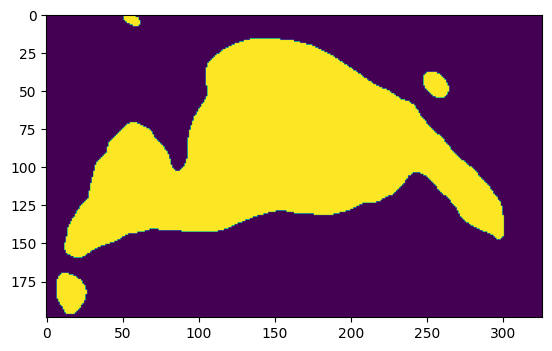

In [64]:
slices = 170
imshow(seg_ref_arr[slices,:,:])

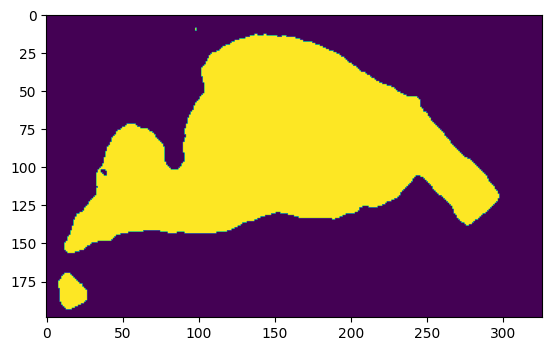

In [65]:
imshow(seg_pred_arr[slices,:,:])

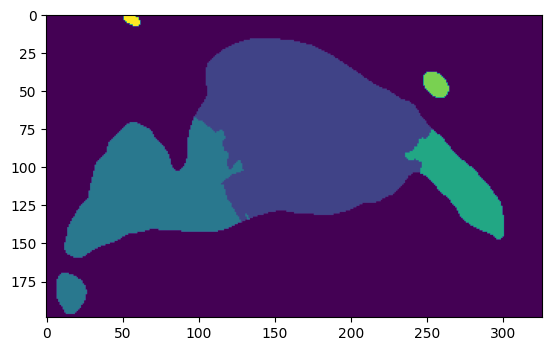

In [66]:
imshow(seg_ref_label_arr[slices,:,:])

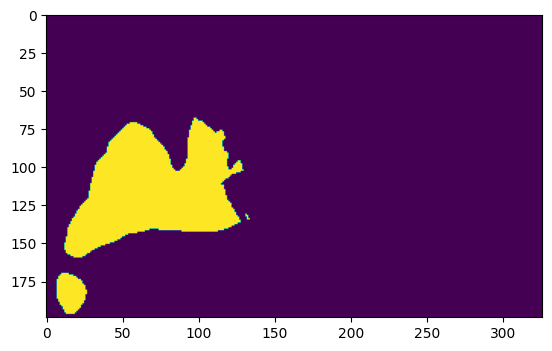

In [67]:
imshow(seg_ref_auricule_arr[170,:,:])

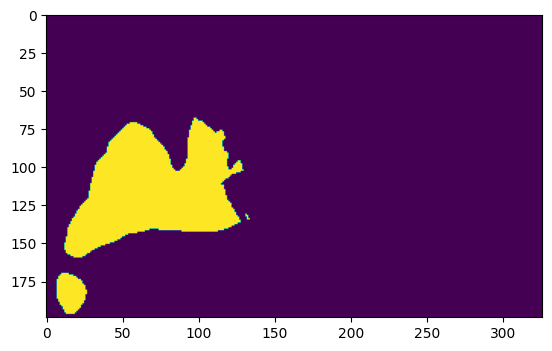

In [68]:
imshow(ref_label_intersection[slices,:,:])

In [69]:
(seg_ref_auricule_arr == ref_label_intersection).all()

True

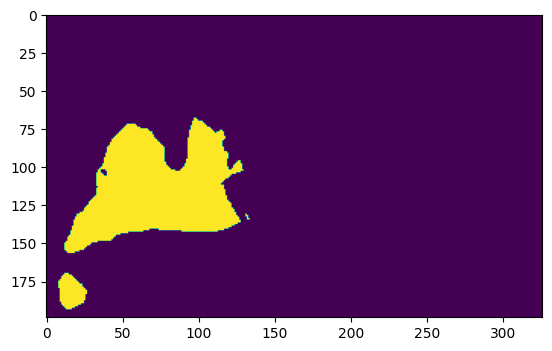

In [70]:
imshow(pred_label_intersection[slices,:,:])

In [71]:
dice_auricle

0.9687546367479908

# Compute Dice auricle for all

In [20]:
import pandas as pd
import numpy as np
from typing import Tuple, List, Union, Optional
import SimpleITK as sitk
import os
pd.options.display.max_rows = 999

In [81]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/patients_history_contour_vol.csv')

df.head()

df['Dice_auricle'] = np.NaN
#df['IoU'] = np.NaN
#df['nnUnet_id'] = np.NaN

for i in range(len(pred_files)):

    seg_ref = sitk.ReadImage(ref_files[i])
    print(ref_files[i])
    seg_pred = sitk.ReadImage(pred_files[i])
    seg_ref_label =  sitk.ReadImage(ref_label_files[i])
    
    
    
    id = int(pred_files[i][-11:-8].split('_')[-1])
    #nnunet_id = int(pred_files[i][-7:-4])
    print(id)
    seg_pred_resampled_labelGaussian = sitk.Resample(seg_pred, seg_ref, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_pred.GetPixelID())
    seg_ref_arr = sitk.GetArrayFromImage(seg_ref)
    
    seg_pred_arr = sitk.GetArrayFromImage(seg_pred_resampled_labelGaussian)
    seg_ref_label_arr = sitk.GetArrayFromImage(seg_ref_label)
    seg_ref_auricule_arr = (seg_ref_label_arr == 2)
    
    ref_label_intersection = get_intersection(seg_ref_arr, seg_ref_auricule_arr)
    pred_label_intersection = get_intersection(seg_pred_arr, seg_ref_auricule_arr)
    
    dice_auricle = compute_dice_coefficient(ref_label_intersection, pred_label_intersection)
    #IoU = compute_IoU_coefficient(seg_ref_arr, seg_pred_arr)
    df.loc[df['ID']==id,'Dice_auricle'] = dice_auricle
    
    #df.loc[df['ID']==id,'Dice'] = dice
    #df.loc[df['ID']==id,'IoU'] = IoU
    #df.loc[df['ID']==id,'nnUnet_id'] = nnunet_id

/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_102_060.mha
102
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_103_061.mha
103
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_104_062.mha
104
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_105_063.mha
105
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_106_064.mha
106
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_107_065.mha
107
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_108_066.mha
108
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_109_067.mha
109
/media/sharedata/atriumC

264
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_265_118.mha
265
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_267_119.mha
267
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_268_120.mha
268
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_269_121.mha
269
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_272_122.mha
272
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_273_123.mha
273
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_274_124.mha
274
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_275_125.mha
275
/media/sharedata/atr

MetaImage: M_ReadElementsData: data not read completely
   ideal = 124282880 : actual = 69991983


77
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_78_047.mha
78
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_79_048.mha
79
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_7_001.mha
7
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_82_049.mha
82
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_84_050.mha
84
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_85_051.mha
85
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_86_052.mha
86
/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/labelsTr/la_trans_corrected_88_053.mha
88
/media/sharedata/atriumCT/atrium_nnunet

In [82]:
df

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,Dice_auricle
0,0,0,6,1,0,1,0,0,0.902653,0.822578,0.0,30901.0,1.080078,0.847656,0.839844,0.959225
1,1,1,7,1,0,1,0,1,0.908900,0.833013,1.0,480983.0,0.354259,0.354259,0.354259,0.608212
2,2,2,8,0,0,0,0,0,0.963089,0.928806,2.0,19060.0,1.046875,0.763672,0.736328,0.987741
3,3,3,9,1,0,1,0,1,0.980152,0.961077,3.0,12770.0,1.158203,0.900391,0.865234,0.990106
4,4,4,11,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,13,0,0,0,0,0,0.950502,0.905673,4.0,20880.0,1.140625,0.888672,0.765625,0.990307
6,6,6,14,1,0,1,0,1,0.969161,0.940168,5.0,16502.0,1.138672,0.720703,0.798828,0.992637
7,7,7,16,0,0,0,0,0,0.976274,0.953648,6.0,13524.0,1.121094,0.787109,0.789062,0.987382
8,8,8,17,0,0,0,0,1,0.965133,0.932615,7.0,21312.0,1.148438,0.748047,0.808594,0.972398
9,9,9,20,0,0,0,0,0,0.962635,0.927961,8.0,16176.0,0.990234,0.921875,0.851562,0.987205


In [84]:
df.to_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/patients_history_contour_vol_dice_auricle.csv', index=False)

In [21]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset003_LA_CT00_corrected/prediction_3d_dataset002/patients_history_contour_vol_dice_auricle.csv')

In [22]:
df

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,Dice_auricle
0,0,0,6,1,0,1,0,0,0.902653,0.822578,0.0,30901.0,1.080078,0.847656,0.839844,0.959225
1,1,1,7,1,0,1,0,1,0.908900,0.833013,1.0,480983.0,0.354259,0.354259,0.354259,0.608212
2,2,2,8,0,0,0,0,0,0.963089,0.928806,2.0,19060.0,1.046875,0.763672,0.736328,0.987741
3,3,3,9,1,0,1,0,1,0.980152,0.961077,3.0,12770.0,1.158203,0.900391,0.865234,0.990106
4,4,4,11,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,13,0,0,0,0,0,0.950502,0.905673,4.0,20880.0,1.140625,0.888672,0.765625,0.990307
6,6,6,14,1,0,1,0,1,0.969161,0.940168,5.0,16502.0,1.138672,0.720703,0.798828,0.992637
7,7,7,16,0,0,0,0,0,0.976274,0.953648,6.0,13524.0,1.121094,0.787109,0.789062,0.987382
8,8,8,17,0,0,0,0,1,0.965133,0.932615,7.0,21312.0,1.148438,0.748047,0.808594,0.972398
9,9,9,20,0,0,0,0,0,0.962635,0.927961,8.0,16176.0,0.990234,0.921875,0.851562,0.987205


In [23]:
df[df['nnUnet_id'].isna()]

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,Dice_auricle
4,4,4,11,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df[(df['ID']!=46)&(df['ID']!=104)&(df['ID']!=11)]

In [25]:
df_opa = df[df['LAA_opacification_defect']==1]

In [26]:
df_no_opa = df[df['LAA_opacification_defect']==0]

In [27]:
df_no_opa.shape

(75, 16)

In [28]:
df_no_opa_without_outliers = df_no_opa[(df_no_opa['ID']!=46)&(df_no_opa['ID']!=104)]

In [29]:
df_opa.shape

(54, 16)

In [30]:
df_no_opa.shape

(75, 16)

<AxesSubplot:>

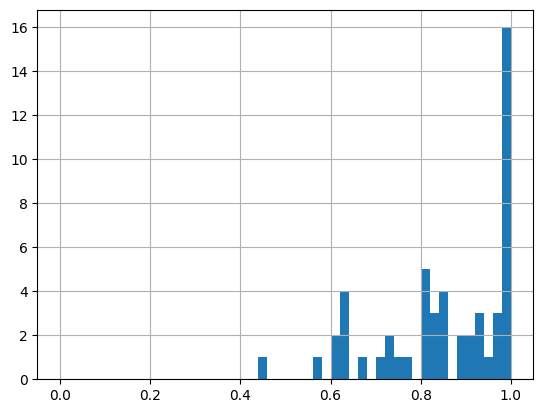

In [31]:
df_opa['Dice_auricle'].hist(bins=50, range=(0, 1))

<AxesSubplot:>

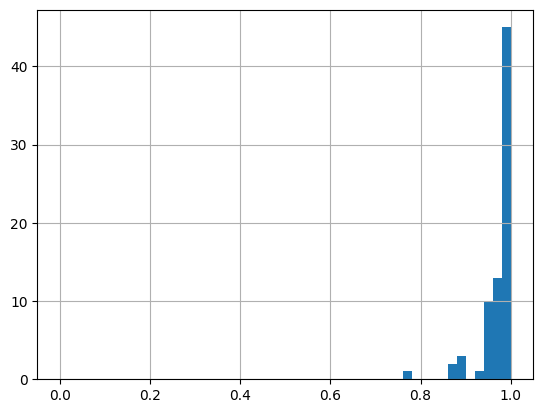

In [32]:
df_no_opa['Dice_auricle'].hist(bins=50, range=(0, 1))

In [33]:
df_opa.describe()[['Dice_auricle', 'IoU']]

,Dice_auricle,IoU
count,53.000000,54.000000
mean,0.851422,0.903113
std,0.141975,0.031829
min,0.454726,0.833013
25%,0.763318,0.886186
50%,0.881277,0.895861
75%,0.980530,0.932496
max,0.999215,0.961656


In [34]:
df_no_opa.describe()[['Dice_auricle', 'IoU']]

,Dice_auricle,IoU
count,75.000000,75.000000
mean,0.970020,0.896538
std,0.037051,0.030301
min,0.775674,0.802570
25%,0.961325,0.877328
50%,0.982054,0.897975
75%,0.990313,0.913849
max,1.000000,0.963833


Cette fois, on voit bien la différence d'erreur au niveau de l'auricule entre les données avec et sans défaut d'opacification.
Les moyennes des Dices valent respectivement 0.85 et 0.97.
On peut aussi voir d'après les distributions que les cas avec les plus petites dices concerne des cas avec défaut d'opacification.
En revanche, un cas qui a un défaut d'opacification n'a pas nécessairement une mauvaise dice.

### Testons en enlevant les outliers.

In [35]:
df[df['Dice_auricle'] < 0.8]

,Unnamed: 0.1,Unnamed: 0,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Contour_Volume,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,Dice_auricle
1,1,1,7,1,0,1,0,1,0.908900,0.833013,1.0,480983.0,0.354259,0.354259,0.354259,0.608212
54,54,54,89,1,0,1,0,1,0.916635,0.846101,54.0,482574.0,0.395604,0.395604,0.395604,0.707271
60,60,60,102,1,0,1,0,1,0.942236,0.890780,60.0,419411.0,0.392915,0.392915,0.392915,0.627200
64,64,64,106,1,0,1,0,1,0.943809,0.893598,64.0,395609.0,0.404168,0.404168,0.404168,0.721462
68,68,68,110,0,0,0,0,1,0.942958,0.892072,68.0,414841.0,0.395683,0.395683,0.395683,0.635135
72,72,72,115,1,1,1,0,1,0.946325,0.898118,72.0,385559.0,0.398828,0.398828,0.398828,0.668070
73,73,73,116,0,0,0,0,1,0.927166,0.864222,73.0,547673.0,0.371915,0.371915,0.371915,0.606824
77,77,77,125,0,0,0,0,0,0.931405,0.871617,77.0,688475.0,0.282101,0.282101,0.282101,0.775674
82,82,82,213,1,0,1,0,1,0.943560,0.893150,82.0,381675.0,0.405115,0.405115,0.405115,0.626646
85,85,85,228,0,0,0,0,1,0.947118,0.899547,84.0,462188.0,0.415823,0.415823,0.415823,0.632523


In [36]:
len(df[df['Dice_auricle'] < 0.8])

15

In [37]:
# Fobs pour l'hypothèse de l'homogénéité des variances, std_opa / std_no_opa
0.141975/0.037051

3.8318803810963264

In [38]:
# S(A)
df_opa['Dice_auricle'].sum()

45.125352721007374

In [39]:
# S(B)
df_no_opa_without_outliers['Dice_auricle'].sum()

72.75151964498835

In [40]:
# S
df_opa['Dice_auricle'].sum() + df_no_opa_without_outliers['Dice_auricle'].sum()

117.87687236599572

In [41]:
df_opa['Dice_auricle_carre'] = df_opa['Dice_auricle']*df_opa['Dice_auricle']

/tmp/ipykernel_43162/2312315197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opa['Dice_auricle_carre'] = df_opa['Dice_auricle']*df_opa['Dice_auricle']


In [42]:
df_no_opa_without_outliers['Dice_auricle_carre'] = df_no_opa_without_outliers['Dice_auricle']*df_no_opa_without_outliers['Dice_auricle']

In [43]:
# S^2(A)
df_opa['Dice_auricle_carre'].sum()

39.468870460305574

In [44]:
# S^2(B)
df_no_opa_without_outliers['Dice_auricle_carre'].sum()

70.67203162326038

In [45]:
# S^2
df_opa['Dice_auricle_carre'].sum() + df_no_opa_without_outliers['Dice_auricle_carre'].sum()

110.14090208356595

In [60]:
# SCE(A)
SCE_A = df_opa['Dice_auricle_carre'].sum() - (df_opa['Dice_auricle'].sum()**2)/53
SCE_A

1.0481637019031638

In [47]:
# SCE(B)
SCE_B = df_no_opa_without_outliers['Dice_auricle_carre'].sum() - (df_no_opa_without_outliers['Dice_auricle'].sum()**2)/75
SCE_B

0.10158348119203708

In [48]:
from math import *

In [61]:
#T
(df_opa['Dice_auricle'].mean() - df_no_opa_without_outliers['Dice_auricle'].mean()) / sqrt((SCE_A + SCE_B)/(53 + 75 - 2)*(1/53 + 1/75))

-6.918738542925171

In [62]:
S_xa_xb = sqrt(((53-1)*0.141975**2 + (75-1)*0.037051**2) / (53+75-2))
S_xa_xb

0.09552462912586952

In [63]:
mean_a = df_opa['Dice_auricle'].mean()
mean_a

0.8514217494529693

In [64]:
mean_b = df_no_opa_without_outliers['Dice_auricle'].mean()
mean_b

0.970020261933178

In [66]:
T = (mean_a - mean_b) / (S_xa_xb * sqrt(1/53 + 1/75))
T

-6.918747214692678

In [67]:
53 + 75 -2

126

In [1]:
import os

In [4]:
l1 = os.listdir('/media/sharedata/atriumCT/corrected_data/GTmasks')

In [5]:
l2 = os.listdir('/media/sharedata/atriumCT/corrected_data/GTmasks2')

In [6]:
l1 == l2

False

In [7]:
len(l1)

132

In [8]:
len(l2)

133

In [27]:
from matplotlib.pyplot import imshow

In [2]:
path = '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/prediction_3d_dataset002/'
files = [f for f in os.listdir( path ) if f[-4:]=='.mha']
files

['la_trans_corrected_102_061.mha',
 'la_trans_corrected_103_062.mha',
 'la_trans_corrected_104_063.mha',
 'la_trans_corrected_105_064.mha',
 'la_trans_corrected_106_065.mha',
 'la_trans_corrected_107_066.mha',
 'la_trans_corrected_108_067.mha',
 'la_trans_corrected_109_068.mha',
 'la_trans_corrected_110_069.mha',
 'la_trans_corrected_111_070.mha',
 'la_trans_corrected_112_071.mha',
 'la_trans_corrected_113_072.mha',
 'la_trans_corrected_115_073.mha',
 'la_trans_corrected_116_074.mha',
 'la_trans_corrected_118_075.mha',
 'la_trans_corrected_11_004.mha',
 'la_trans_corrected_120_076.mha',
 'la_trans_corrected_123_077.mha',
 'la_trans_corrected_125_078.mha',
 'la_trans_corrected_128_079.mha',
 'la_trans_corrected_131_080.mha',
 'la_trans_corrected_13_005.mha',
 'la_trans_corrected_14_006.mha',
 'la_trans_corrected_150_081.mha',
 'la_trans_corrected_155_082.mha',
 'la_trans_corrected_16_007.mha',
 'la_trans_corrected_17_008.mha',
 'la_trans_corrected_20_009.mha',
 'la_trans_corrected_213_0

In [3]:
path = '/media/sharedata/atriumCT/corrected_data/GTlabels/'
files_id_labels = [f for f in os.listdir( path ) if f[-4:]=='.mha']
files_id_labels

['102.mha',
 '103.mha',
 '104.mha',
 '105.mha',
 '106.mha',
 '107.mha',
 '108.mha',
 '109.mha',
 '11.mha',
 '110.mha',
 '111.mha',
 '112.mha',
 '113.mha',
 '115.mha',
 '116.mha',
 '118.mha',
 '120.mha',
 '123.mha',
 '125.mha',
 '128.mha',
 '13.mha',
 '131.mha',
 '14.mha',
 '150.mha',
 '155.mha',
 '16.mha',
 '17.mha',
 '20.mha',
 '21.mha',
 '213.mha',
 '22.mha',
 '227.mha',
 '228.mha',
 '23.mha',
 '230.mha',
 '231.mha',
 '232.mha',
 '233.mha',
 '234.mha',
 '235.mha',
 '236.mha',
 '237.mha',
 '238.mha',
 '239.mha',
 '24.mha',
 '240.mha',
 '241.mha',
 '242.mha',
 '243.mha',
 '244.mha',
 '245.mha',
 '246.mha',
 '247.mha',
 '249.mha',
 '25.mha',
 '251.mha',
 '252.mha',
 '253.mha',
 '254.mha',
 '255.mha',
 '256.mha',
 '257.mha',
 '258.mha',
 '259.mha',
 '260.mha',
 '261.mha',
 '262.mha',
 '263.mha',
 '264.mha',
 '265.mha',
 '267.mha',
 '268.mha',
 '269.mha',
 '27.mha',
 '272.mha',
 '273.mha',
 '274.mha',
 '275.mha',
 '276.mha',
 '277.mha',
 '278.mha',
 '28.mha',
 '282.mha',
 '29.mha',
 '30.m

In [4]:
print( len(files))

132


In [5]:
pred_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/prediction_3d_dataset002/' + f for f in files]

In [6]:
ref_files = ['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/' + f for f in files]

In [7]:
ref_files

['/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_102_061.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_103_062.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_104_063.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_105_064.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_106_065.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_107_066.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_108_067.mha',
 '/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_

In [8]:
ref_label_files = ['/media/sharedata/atriumCT/corrected_data/GTlabels/' + f[-11:-8].split('_')[-1] + '.mha' for f in files]

In [9]:
ref_label_files

['/media/sharedata/atriumCT/corrected_data/GTlabels/102.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/103.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/104.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/105.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/106.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/107.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/108.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/109.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/110.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/111.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/112.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/113.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/115.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/116.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/118.mha',
 '/media/sharedata/atriumCT/corrected_data/GTlabels/11.mha',
 '/media/

In [10]:
def get_intersection(mask_1, mask_2):
    return (mask_1 & mask_2)

In [13]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/prediction_3d_dataset002/patients_history_contour_vol.csv')

df.head()

df['Dice_auricle'] = np.NaN
#df['IoU'] = np.NaN
#df['nnUnet_id'] = np.NaN

#for i in range(len(pred_files[:5])):
i=0
seg_ref = sitk.ReadImage(ref_files[i])
print(ref_files[i])
seg_pred = sitk.ReadImage(pred_files[i])
seg_ref_label =  sitk.ReadImage(ref_label_files[i])



id = int(pred_files[i][-11:-8])
#nnunet_id = int(pred_files[i][-7:-4])
print(id)
seg_pred_resampled_labelGaussian = sitk.Resample(seg_pred, seg_ref, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_pred.GetPixelID())
seg_ref_arr = sitk.GetArrayFromImage(seg_ref)

seg_pred_arr = sitk.GetArrayFromImage(seg_pred_resampled_labelGaussian)
seg_ref_label_arr = sitk.GetArrayFromImage(seg_ref_label)
seg_ref_auricule_arr = (seg_ref_label_arr == 2)

ref_label_intersection = get_intersection(seg_ref_arr, seg_ref_auricule_arr)
pred_label_intersection = get_intersection(seg_pred_arr, seg_ref_auricule_arr)

dice_auricle = compute_dice_coefficient(ref_label_intersection, pred_label_intersection)
#IoU = compute_IoU_coefficient(seg_ref_arr, seg_pred_arr)
#df.loc[df['ID']==id,'Dice_auricle'] = dice

#df.loc[df['ID']==id,'Dice'] = dice
#df.loc[df['ID']==id,'IoU'] = IoU
#df.loc[df['ID']==id,'nnUnet_id'] = nnunet_id

/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_102_061.mha
102


In [14]:
seg_ref_arr.shape

(202, 247, 311)

In [15]:
seg_pred_arr.shape

(202, 247, 311)

In [16]:
seg_ref_label_arr.shape

(202, 247, 311)

In [17]:
seg_ref_auricule_arr.shape

(202, 247, 311)

### ##### Test en réorientant le label vers l'image d'origine(contraire)

In [18]:
seg_ref_label_to_seg_pred = sitk.Resample(seg_ref_label, seg_pred, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_ref_label.GetPixelID())

In [19]:
seg_ref_to_seg_pred = sitk.Resample(seg_ref, seg_pred, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_ref.GetPixelID())

In [22]:
seg_ref_label_to_seg_pred_arr = sitk.GetArrayFromImage(seg_ref_label_to_seg_pred)
seg_ref_label_to_seg_pred_arr.shape

(339, 512, 512)

In [23]:
seg_ref_to_seg_pred_arr = sitk.GetArrayFromImage(seg_ref_to_seg_pred)
seg_ref_to_seg_pred_arr.shape

(339, 512, 512)

In [55]:
seg_pred_arr = sitk.GetArrayFromImage(seg_pred)

In [24]:
seg_pred.GetSize()

(512, 512, 339)

In [25]:
sitk.GetArrayFromImage(seg_pred).shape

(339, 512, 512)

In [29]:
slices=170

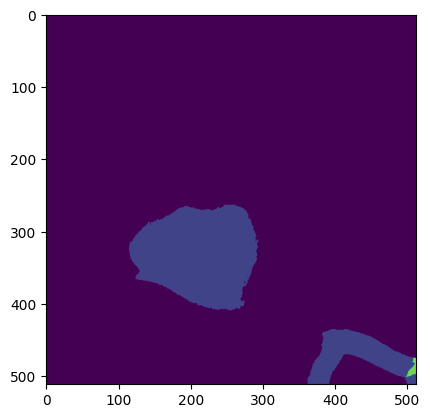

In [30]:
imshow(seg_ref_label_to_seg_pred_arr[slices,:,:] + sitk.GetArrayFromImage(seg_pred)[slices,:,:])

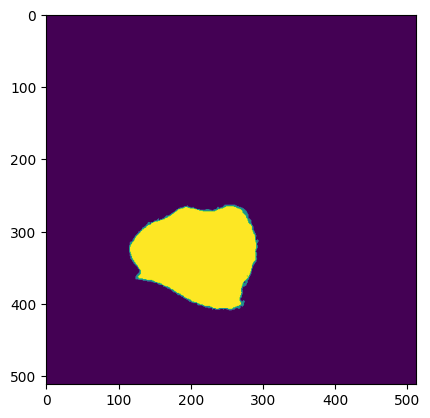

In [31]:
imshow(seg_ref_to_seg_pred_arr[slices,:,:] + sitk.GetArrayFromImage(seg_pred)[slices,:,:])

### ###

In [40]:
seg_ref_label.SetDirection((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))

In [41]:
seg_ref_label.GetDirection()

(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

In [161]:
seg_ref_label_to_seg_pred = sitk.Resample(seg_ref_label, seg_pred, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_ref_label.GetPixelID())

seg_ref_label_to_seg_pred_arr = sitk.GetArrayFromImage(seg_ref_label_to_seg_pred)
seg_ref_label_to_seg_pred_arr.shape

(339, 512, 512)

In [162]:
slices=230

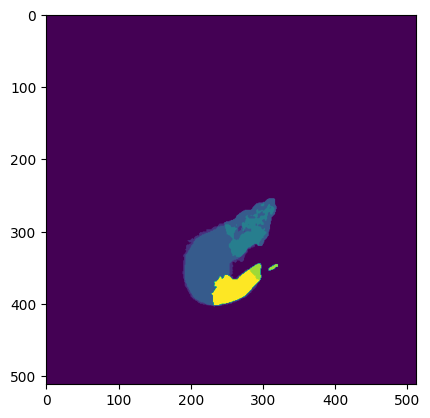

In [163]:
imshow(seg_ref_label_to_seg_pred_arr[slices,:,:] + seg_pred_arr[slices,:,:])

In [58]:
np.unique(seg_ref_label_to_seg_pred_arr)

array([0., 1., 2., 3., 4., 5., 6.])

In [61]:
seg_ref_auricule_arr = (seg_ref_label_to_seg_pred_arr == 2).astype(int)

In [62]:
np.unique(seg_ref_auricule_arr)

array([0, 1])

In [64]:
intersec_pred_auricle = get_intersection(seg_pred_arr, seg_ref_auricule_arr)

In [65]:
def get_union(mask_1, mask_2):
    return (mask_1 | mask_2)

In [66]:
union_pred_auricle = get_union(seg_pred_arr, seg_ref_auricule_arr)

In [67]:
type(seg_pred_arr)

numpy.ndarray

In [139]:
opacification_defect_arr = (union_pred_auricle - seg_pred_arr)

In [140]:
np.unique(test)

array([0, 1])

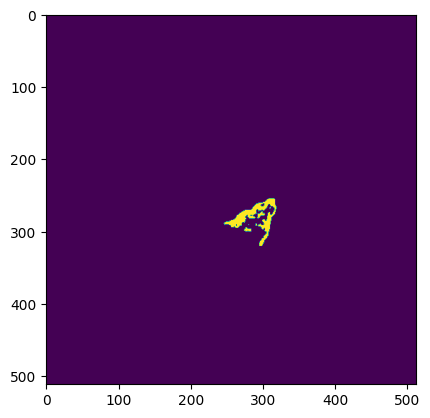

In [150]:
imshow(opacification_defect_arr[slices,:,:])

In [151]:
img = sitk.GetImageFromArray(opacification_defect_arr)

In [152]:
img = sitk.Cast(img,sitk.sitkUInt8)

In [153]:
type(opacification_defect_arr)

numpy.ndarray

In [154]:
img

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fdfd5fed6c0> >

In [155]:
img.GetSize()

(512, 512, 339)

In [156]:
img.CopyInformation(seg_pred)

In [157]:
sitk.WriteImage(img,'/media/sharedata/atriumCT/mask_labelled_resampled/opacification_defect_102.mha' ,useCompression=True)

In [86]:
sitk.image_duplicator(seg_pred)

AttributeError: module 'SimpleITK' has no attribute 'image_duplicator'

In [ ]:
img.

In [98]:
bla = sitk.Image(seg_pred)

In [104]:
seg_pred.GetDirection()

(-1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [149]:
seg_pred.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))

In [103]:
bla.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [ ]:
bla.

In [105]:
sitk.sitkUInt8

1

In [119]:
import itk
print( itk.Version.GetITKVersion() )

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


5.2.1


# Save labels in right direction

In [3]:
import os
import SimpleITK as sitk

In [4]:
dataset = 'Dataset004_LA_CT00_corrected_voted'
path = f'/media/sharedata/atriumCT/atrium_nnunet/raw_data/{dataset}/prediction_3d_dataset002/'
files = [f for f in os.listdir( path ) if f[-4:]=='.mha']

pred_files = [f'/media/sharedata/atriumCT/atrium_nnunet/raw_data/{dataset}/prediction_3d_dataset002/' + f for f in files]
ref_files = [f'/media/sharedata/atriumCT/atrium_nnunet/raw_data/{dataset}/labelsTr/' + f for f in files]
ref_label_files = ['/media/sharedata/atriumCT/corrected_data/GTlabels/' + f[-11:-8].split('_')[-1] + '.mha' for f in files]

In [5]:
len(pred_files)

132

In [47]:
def get_intersection(mask_1, mask_2):
    return (mask_1 & mask_2)

def get_union(mask_1, mask_2):
    return (mask_1 | mask_2)




#for i in range(len(pred_files[:5])):
i=0
print(ref_files[i])
seg_pred = sitk.ReadImage(pred_files[i])
seg_ref_label =  sitk.ReadImage(ref_label_files[i])
seg_ref = sitk.ReadImage(ref_files[i])



origin_id = int(pred_files[i][-11:-8].split('_')[-1])
nnunet_id = int(pred_files[i][-7:-4])
print(origin_id)


seg_ref_arr = sitk.GetArrayFromImage(seg_ref).astype(int)
seg_pred_arr = sitk.GetArrayFromImage(seg_pred)
seg_ref_label.SetDirection((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0))


seg_ref_label_to_seg_pred = sitk.Resample(seg_ref_label, seg_pred, sitk.Transform(), sitk.sitkLabelGaussian, 0, seg_ref_label.GetPixelID())
seg_ref_label_to_seg_pred_arr = sitk.GetArrayFromImage(seg_ref_label_to_seg_pred)
print(seg_ref_label_to_seg_pred_arr.shape)

# Save reoriented labels
#sitk.WriteImage(seg_ref_label_to_seg_pred, f'/media/sharedata/atriumCT/corrected_data/GTlabels_reoriented/{origin_id}.mha' ,useCompression=True)


seg_ref_auricule_arr = (seg_ref_label_to_seg_pred_arr == 2).astype(int)

intersec_pred_auricle = get_intersection(seg_pred_arr, seg_ref_auricule_arr)
union_pred_auricle = get_union(seg_pred_arr, seg_ref_auricule_arr)

# the logical operation of (the union between the LA prediction and the auricle label) minus the prediction
# gives the error, that is to say: the opacification defect
opacification_defect_arr = (union_pred_auricle - seg_pred_arr)

opacification_defect_mask = sitk.GetImageFromArray(opacification_defect_arr)
opacification_defect_mask = sitk.Cast(opacification_defect_mask, sitk.sitkUInt8) # Cast necessary to be opened in MUSIC
opacification_defect_mask.CopyInformation(seg_pred)

# Save opacification defect masks
#sitk.WriteImage(opacification_defect_mask,f'/media/sharedata/atriumCT/corrected_data/GTopacification_defect/{origin_id}.mha' ,useCompression=True)

/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset004_LA_CT00_corrected_voted/labelsTr/la_trans_corrected_102_061.mha
102
(339, 512, 512)


### Control

In [7]:
from matplotlib.pyplot import imshow

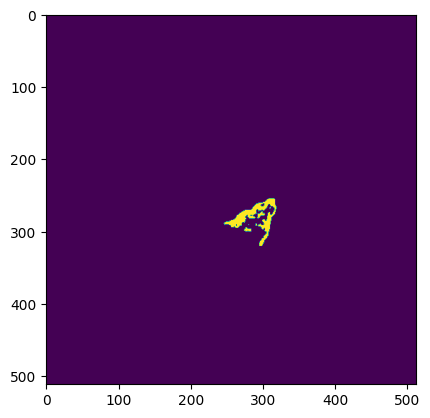

In [8]:
slices = 230
imshow(opacification_defect_arr[slices,:,:])

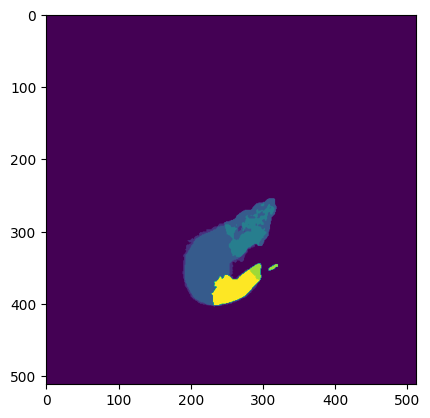

In [9]:
imshow(seg_ref_label_to_seg_pred_arr[slices,:,:] + seg_pred_arr[slices,:,:])

In [11]:
import numpy as np

In [12]:
seg_value = 1

np_seg = np.array(seg_ref_auricule_arr)
segmentation = np.where(np_seg == seg_value)

x_min = int(np.min(np_seg[1]))

In [13]:
x_min

0

In [14]:

segmentation = np.where(np_seg == seg_value)

# Bounding Box
bbox = 0, 0, 0, 0
if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
    x_min = int(np.min(segmentation[1]))
    x_max = int(np.max(segmentation[1]))
    y_min = int(np.min(segmentation[0]))
    y_max = int(np.max(segmentation[0]))

    bbox = x_min, x_max, y_min, y_max

In [15]:
label_filter = sitk.LabelShapeStatisticsImageFilter()
label_filter.Execute(seg_ref_auricule_arr)

bounding_box = label_filter.GetBoundingBox(1)

TypeError: in method 'LabelShapeStatisticsImageFilter_Execute', argument 2 of type 'itk::simple::Image const &'

In [16]:
def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

In [17]:
np.unique(seg_ref_auricule_arr)

array([0, 1])

In [18]:
bbox2_3D(seg_ref_auricule_arr)

(214, 265, 220, 337, 242, 319)

In [19]:
np.shape(seg_ref_auricule_arr)

(339, 512, 512)

In [20]:
new_array = np.zeros(np.shape(seg_ref_auricule_arr))

new_array[214:265+1, 220:337+1, 242:319+1]=1

In [21]:
slices = 220

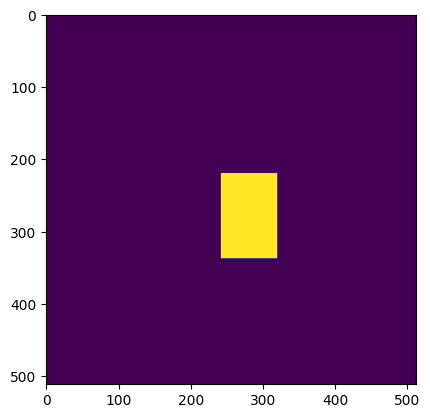

In [22]:
imshow(new_array[slices,:,:])

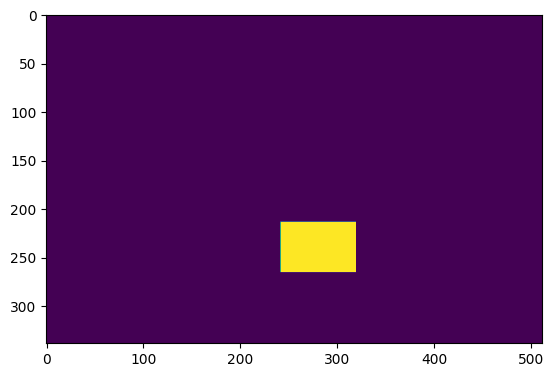

In [23]:
imshow(new_array[:,230,:])

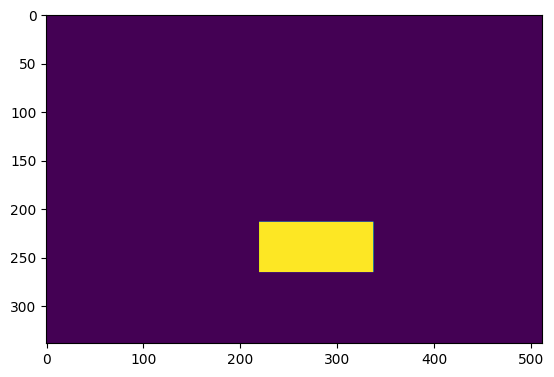

In [24]:
imshow(new_array[:,:, 250])

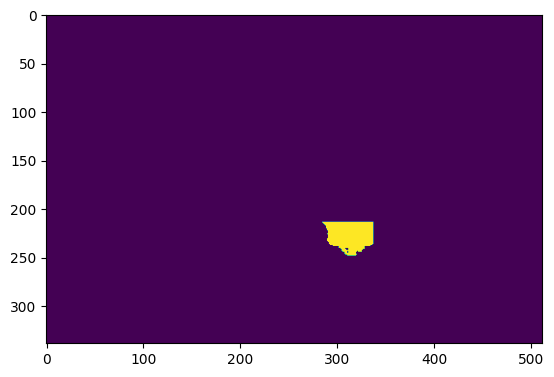

In [25]:
imshow((seg_pred_arr * new_array)[:,:, 250])

In [26]:
import metrics
pred_auricule_intersection = metrics.get_intersection(seg_pred_arr, seg_ref_auricule_arr)


In [54]:
multiplication_bbox_auricle_seg_ref = (bbox_auricle * seg_ref_arr).astype(int)

In [55]:
bbox_auricle_coord = bbox2_3D(seg_ref_auricule_arr)
bbox_auricle = np.zeros(np.shape(seg_ref_auricule_arr))
bbox_auricle[bbox_auricle_coord[0]:bbox_auricle_coord[1]+1, bbox_auricle_coord[2]:bbox_auricle_coord[3]+1, bbox_auricle_coord[4]:bbox_auricle_coord[5]+1]=1
multiplication_bbox_auricle_seg_pred = (bbox_auricle * seg_pred_arr).astype(int)
new_dice_auricle = metrics.compute_dice_coefficient(multiplication_bbox_auricle_seg_pred, multiplication_bbox_auricle_seg_ref)
new_dice_auricle



0.6777472064686395

In [28]:
dice_auricle = metrics.compute_dice_coefficient(seg_ref_auricule_arr, pred_auricule_intersection)
dice_auricle

0.6272026174339799

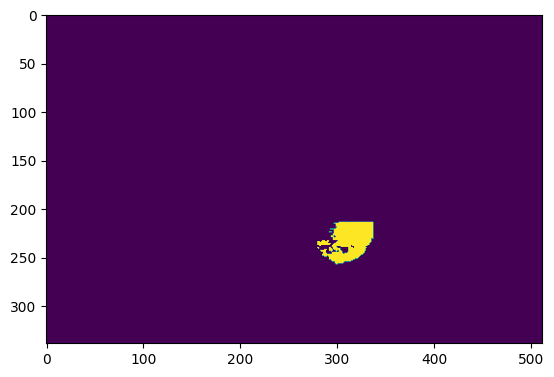

In [38]:
imshow((multiplication_bbox_auricle_seg_pred)[:,:, 270])

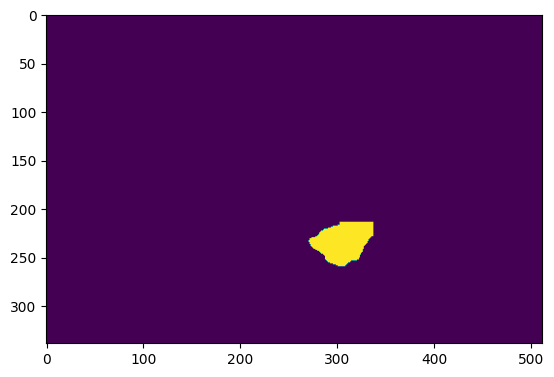

In [49]:
imshow((multiplication_bbox_auricle_seg_ref)[:,:, 270])

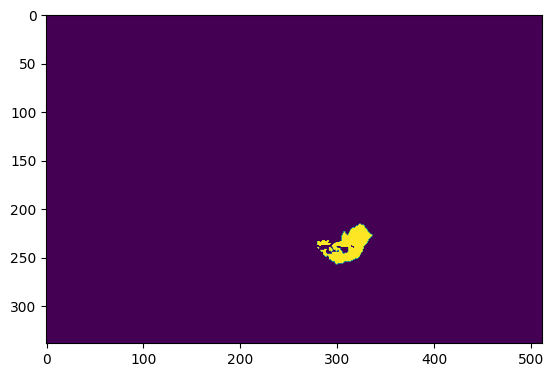

In [41]:
imshow((pred_auricule_intersection)[:,:, 270])